# 6000 Largest Companies in the World

We will take a look at the largest world companies in this example. The data comes from https://companiesmarketcap.com

Exercise Goals & Objectives:
- Pandas
- Matplotlib
- EDA Analysis

Data Set:
    Read the CSV file **LargestCompanies.csv** from datasets folder 

# 1. Import the Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 2. Read LargestCompanies.csv as a DataFrame using Pandas

In [6]:
df = pd.read_csv("datasets/LargestCompanies.csv")
df.head()

,Rank,Name,Symbol,marketcap,price (USD),country
0,1,Apple,AAPL,2801388224512,171.66,United States
1,2,Microsoft,MSFT,2256182968320,300.95,United States
2,3,Saudi Aramco,2222.SR,1973864961187,9.88,Saudi Arabia
3,4,Alphabet (Google),GOOG,1838538817536,2778.76,United States
4,5,Amazon,AMZN,1607290585088,3158.71,United States


# 3. Use Pandas groupby() method to count how many companies located in each country in the dataset

In [7]:
countries = df.groupby("country")["Symbol"].count()
countries

country
Argentina                 13
Australia                 45
Austria                   30
BM                         1
Bahamas                    2
                        ... 
Turkey                    29
United Arab Emirates       2
United Kingdom           108
United States           3259
Uruguay                    2
Name: Symbol, Length: 68, dtype: int64

# 4. Sort the result in descending order

In [8]:
countries.sort_values(ascending=False, inplace=True)

In [9]:
countries

country
United States    3259
India             530
Japan             224
Canada            211
China             192
                 ... 
Estonia             1
Egypt               1
Costa Rica          1
BM                  1
Philippines         1
Name: Symbol, Length: 68, dtype: int64

# 5. Plot 5 first contries with the largest number of companies as a pie plot

In [10]:
top = countries.iloc[:5]

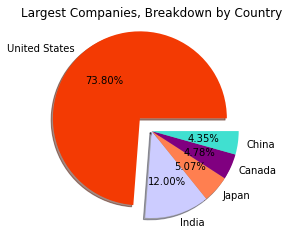

In [20]:
x = top.values
labels = top.index
palette = ["#F33A03","#CCCCFF","#FF7F50","#800080","#40E0D0"]
standout =[0.2, 0.0, 0, 0,0]
plt.title("Largest Companies, Breakdown by Country")
plt.pie(x, labels=labels, colors=palette, explode=standout, autopct='%.2f%%', shadow=True);

# 6. How many companies in the dataset located in United Kingdom

In [22]:
df[df["country"] == "United Kingdom"].count()

Rank           108
Name           108
Symbol         108
marketcap      108
price (USD)    108
country        108
dtype: int64

# 7. What is the total capitalization of all the companies in United Kingdom

In [24]:
uk_cap = df[df["country"] == "United Kingdom"]["marketcap"].sum()
uk_cap

2558601082064

# 8. What percentage is United Kingdom capitalization of the total market capitalization of all companies in the dataset

In [25]:
total_cap = df["marketcap"].sum()

In [29]:
uk_percent = round((uk_cap/total_cap)*100,2)
uk_percent

2.74

# 9. Which company has Symbol NSRGY, get the Company name and Country of origin

In [33]:
df[["Name","country"]][df["Symbol"]=="NSRGY"]

,Name,country
23,Nestlé,Switzerland


# 10. Using method describe get the mean market capitalization of all companies in the dataset

In [34]:
df.describe()

,Rank,marketcap,price (USD)
count,5943.000000,5.943000e+03,5943.000000
mean,2972.000000,1.573135e+10,171.654897
std,1715.740656,7.348253e+10,6350.245662
min,1.000000,0.000000e+00,0.000000
25%,1486.500000,8.304696e+08,6.570000
50%,2972.000000,3.128072e+09,22.110000
75%,4457.500000,1.060327e+10,57.455000
max,5943.000000,2.801388e+12,474900.000000


In [36]:
df.describe().loc["mean","marketcap"]

15731351090.098604

# 11. Get the total market capitalization by country

Hint: use groupby() and aggrigation method sum()

In [40]:
country_cap = df.groupby("country")["marketcap"].sum()
country_cap

country
Argentina                  65766226272
Australia                1345593816806
Austria                   190648886968
BM                         11289454592
Bahamas                     1077775120
                             ...      
Turkey                     82409011368
United Arab Emirates        1797135872
United Kingdom           2558601082064
United States           48790307366933
Uruguay                    10486091520
Name: marketcap, Length: 68, dtype: int64

# 12. Sort the results in descending order

In [41]:
country_cap.sort_values(ascending=False, inplace=True)

# 13. Get the top 10 countries by market capitalization

In [42]:
country_cap = country_cap.iloc[:10]
country_cap

country
United States     48790307366933
China              7165398618621
Japan              4320293261415
India              3081335973189
France             2922064964879
United Kingdom     2558601082064
Canada             2501938404821
Germany            2410540233495
Saudi Arabia       2399150825867
Switzerland        2109920262575
Name: marketcap, dtype: int64

# 14. Convert absolut numbers in the 10 top contries by market capitalization into Trillions, there are 12 zeros in one trillion

Hint: divide numbers by 1000000000000 and round them

In [51]:
country_cap = (country_cap/1000000000000).round(2)

# 15. the top 10 countries by market capitalization as horizontal bar plot

Hint: use plt.barh()

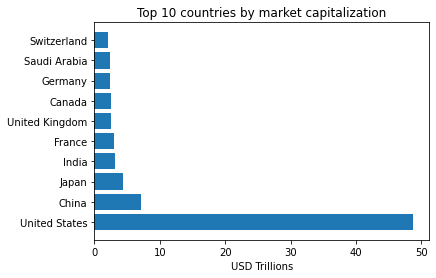

In [52]:
x = country_cap.index
h = country_cap.values
plt.title("Top 10 countries by market capitalization")
plt.xlabel("USD Trillions")
plt.barh(x, h);